# Perceptron Networks
0. [Sum Function](#0-sum-function)
1. Single Layer
2. Single Layer and Training
3. Multi Layer

## 0. Sum Function
    This Summation function will be used for the three models of perceptron used in this notebook.

In [50]:
# Setup

## Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
rd = np.random

In [7]:
# Define Summation Function
def sum_function(inputs, weights) -> float:
    '''
    Sum of the product of the inputs by the weights
    + w[i] * x[i]
    + w[i+1] * x[i+1] 
    + ... + w[n] * x[n]

    @return float: The Net Input / Pre-Activation result
    '''
    net_input: float = inputs.dot(weights)
    return net_input


## 1. Single Layer perceptron

In [9]:
# Define the Step Function
def step_function(net_input) -> int:
    '''
    1, if net_input >= 1
    0, if net_input < 1
    
    @return int: The Activation result
    '''
    activation: int = int(net_input >= 1)
    return activation

In [10]:
# Setup the case scenario #1
inputs  = np.array([-1,  7, 5])
weights = np.array([.8, .1, 0])

# Run the Perceptron
net_input: float = sum_function(inputs, weights)
activation: int  = step_function(net_input)

print(f'Summation: {net_input}\nStep Func: {activation}')

Summation: -0.09999999999999998
Step Func: 0


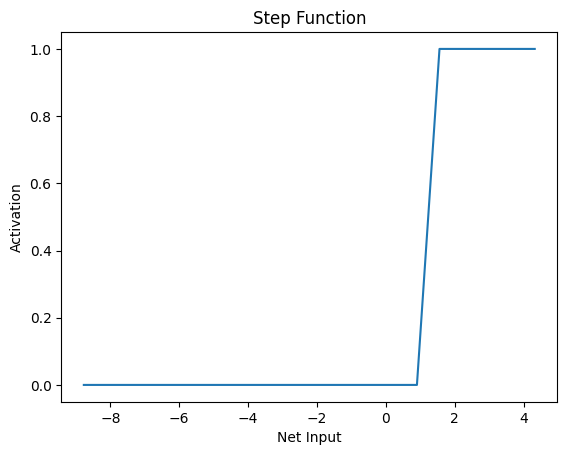

In [77]:
# Net Input VS. Activation 
inputs = []
weights = []
net_input = []
activation = []

for i in range(10):
    seed1, seed2 = 42 + i, 73 + i
    rd.seed(seed1)
    inputs.append(rd.randint(-10, 10, 3))
    rd.seed(seed2)
    weights.append(np.round(rd.rand(3), 4))

    # Run the Perceptron
    net_input.append(sum_function(inputs[i], weights[i]))
    activation.append(step_function(net_input[i]))


df1 = pd.DataFrame({
    'Inputs': inputs, 
    'Weights': weights, 
    'Net Input': net_input, 
    'Activation': activation
})
# display(df1)

sns.lineplot(x='Net Input', y='Activation', data=df1)
plt.title('Step Function')
plt.show()

## 2. Single layer with Training
> Now a ANN to predict logic gate (AND, NAND, OR, NOR) outputs based on two inputs

In [78]:
inputs  = np.array([
    [0,0], # 0
    [0,1], # 1
    [1,0], # 2
    [1,1], # 3
])

outputs = {
     'AND': np.array([0,0,0,1]),
    'NAND': np.array([1,1,1,0]),
      'OR': np.array([0,1,1,1]),
     'NOR': np.array([1,0,0,0]),
}

LEARN_RATE = 0.1

In [105]:
def get_output(inputs, weights):
    '''
    Computes the output of a perceptron using a step function.

    Args:
        inputs (list of float): The input values to the perceptron.
        weights (list of float): The weights associated with the inputs.

    Returns:
        int: The output of the perceptron after applying the step function.
    '''
    s = sum_function(inputs, weights)
    return step_function(s)

def train(gate):
    total_error = 1
    weights     = np.array([0.0, 0.0]) # manually initialized
    GATE        = outputs[gate]
    epoch       = 0
    
    while(total_error != 0): # STOP CONDITION -----------------------------------------------
        '''
        Checks for stop condition
        If != 0, reset total_error and continue training
        '''
        
        # Reset total_error
        total_error = 0
        
        print(f'\n --- EPOCH {epoch}', '----------------------------', '\n')
        print(f'WEIGHTS: {weights}')
        for i in range(len(GATE)): # ERROR UPDATE -------------------------------------------
            current_output = get_output(np.asarray(inputs[i]), weights)
            current_error  = abs(GATE[i] - current_output)
            total_error    += current_error
            

            print(f'IN{[i]}: ________ {inputs[i]}')
            for j in range(len(weights)): # LEARNING PHASE ----------------------------------
                tmp_weight = weights[j]
                weights[j] = weights[j] + (LEARN_RATE * inputs[i][j] * current_error)

                print(f'\tOUT[{j}]: {current_output}', end='')
                
                if weights[j] != tmp_weight:
                    print(f', Weight[{j}] updated: {weights[j]}')
                else:
                    print()
                
            print(f'\tcurrent_error: {current_error}')
        
        # Update the epoch
        epoch       += 1


        print(f' ---------------------------- Total error: {total_error}')
        print('_'*50)
        
    print()
    print(f'>>> Training complete!')
    print(f'Final weights: W0={weights[0]} and W1={weights[1]}')

In [106]:
train('AND')


 --- EPOCH 0 ---------------------------- 

WEIGHTS: [0. 0.]
IN[0]: ________ [0 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[1]: ________ [0 1]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[2]: ________ [1 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[3]: ________ [1 1]
	OUT[0]: 0, Weight[0] updated: 0.1
	OUT[1]: 0, Weight[1] updated: 0.1
	current_error: 1
 ---------------------------- Total error 1
__________________________________________________

 --- EPOCH 1 ---------------------------- 

WEIGHTS: [0.1 0.1]
IN[0]: ________ [0 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[1]: ________ [0 1]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[2]: ________ [1 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[3]: ________ [1 1]
	OUT[0]: 0, Weight[0] updated: 0.2
	OUT[1]: 0, Weight[1] updated: 0.2
	current_error: 1
 ---------------------------- Total error 1
__________________________________________________

 --- EPOCH 2 ---------------------------- 

WEIGHTS: [0.2 0.2]
IN[0]: ________ [0 0]
	OUT[0

In [9]:
train('OR')

WEIGHTS: [0. 0.]
IN[0]: ________ [0 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[1]: ________ [0 1]
	OUT[0]: 0
	OUT[1]: 0, Weight[1] updated: 0.1
	current_error: 1
IN[2]: ________ [1 0]
	OUT[0]: 0, Weight[0] updated: 0.1
	OUT[1]: 0
	current_error: 1
IN[3]: ________ [1 1]
	OUT[0]: 0, Weight[0] updated: 0.2
	OUT[1]: 0, Weight[1] updated: 0.2
	current_error: 1

 --- END OF EPOCH 1 Total error 3 ---------------------------- 

WEIGHTS: [0.2 0.2]
IN[0]: ________ [0 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[1]: ________ [0 1]
	OUT[0]: 0
	OUT[1]: 0, Weight[1] updated: 0.30000000000000004
	current_error: 1
IN[2]: ________ [1 0]
	OUT[0]: 0, Weight[0] updated: 0.30000000000000004
	OUT[1]: 0
	current_error: 1
IN[3]: ________ [1 1]
	OUT[0]: 0, Weight[0] updated: 0.4
	OUT[1]: 0, Weight[1] updated: 0.4
	current_error: 1

 --- END OF EPOCH 2 Total error 3 ---------------------------- 

WEIGHTS: [0.4 0.4]
IN[0]: ________ [0 0]
	OUT[0]: 0
	OUT[1]: 0
	current_error: 0
IN[1]: ________ [0 1]
	OUT[0]: 

In [12]:
# WONT STOP BECAUSE OF STOP CONDITION
# train('NAND') - Keeps increasing weights
# train('NOR')  - Never updates weights

## 3. Multi-layer perceptron

In [13]:
# TODO